# Proof of concept
## Concensiousness

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_validate

## Import Data

In [49]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_02.set")

print(data_loo.info)
print(data_tst.info)

Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_02.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq:

Get data and reduce them

In [50]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
csp = CSP(n_components=6, transform_into='average_power')

x_csp_average = csp.fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 8 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-1.2914822  -0.88632756 -0.51320967 -1.92866471 -1.53036937 -0.805537  ]
 [-0.89208774 -0.35877956 -1.4335205  -1.70896103 -1.26420468  0.06993202]
 [-1.28082043 -1.83111204 -1.7105161   0.31088006 -1.58945684 -2.07868669]
 ...
 [-0.04988749 -0.4538856  -1.01266451 -1.21901488 -1.06053201 -0.01805965]
 [ 0.7344182  -0.5214834  -0.56665054  0.05419206 -0.80953653 -1.49719722]
 [-1.56027926 -0.66720475 -0.7227454  -0.80674

In [51]:
y = y - 1
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [52]:
X2 = pd.DataFrame(x_csp_average)
X2

,0,1,2,3,4,5
0,-1.291482,-0.886328,-0.513210,-1.928665,-1.530369,-0.805537
1,-0.892088,-0.358780,-1.433521,-1.708961,-1.264205,0.069932
2,-1.280820,-1.831112,-1.710516,0.310880,-1.589457,-2.078687
3,-0.129464,-0.964238,-1.835661,-1.822631,-2.110521,-0.088511
4,-0.592715,-0.540658,-1.404375,-0.711744,-1.574846,-0.282342
...,...,...,...,...,...,...
475,-1.597987,-0.666707,-1.505596,0.047970,-0.838545,-1.707438
476,0.084863,-1.426108,-1.131338,-0.817489,-0.749081,-1.787761
477,-0.049887,-0.453886,-1.012665,-1.219015,-1.060532,-0.018060
478,0.734418,-0.521483,-0.566651,0.054192,-0.809537,-1.497197


In [53]:
classifier = RandomForestClassifier()
cv = LeaveOneOut()

score = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=x_csp_average, y=y, scoring="accuracy")
score

{'fit_time': array([0.30304885, 0.37799954, 0.43699574, 0.35299778, 0.34300232,
        0.52999926, 0.45893145, 0.36904097, 0.62798452, 0.61294866,
        0.65994835, 0.4279716 , 0.59804392, 0.60904598, 0.60295558,
        0.60705352, 0.60700178, 0.49405456, 0.52899575, 0.60095787,
        0.61213279, 0.55299664, 0.53399706, 0.54799628, 0.53096437,
        0.55400324, 0.56799364, 0.53300166, 0.50098228, 0.21199942,
        0.2159965 , 0.15800357, 0.15803051, 0.16200328, 0.19100404,
        0.18599772, 0.17397189, 0.16299629, 0.17699957, 0.16200185,
        0.16003537, 0.15900087, 0.170995  , 0.17102981, 0.16702938,
        0.21103311, 0.18303037, 0.16499972, 0.16303587, 0.17496753,
        0.17303658, 0.16303062, 0.16199851, 0.15700865, 0.16100121,
        0.16299868, 0.16996193, 0.15796685, 0.16302848, 0.16799831,
        0.17400384, 0.16596627, 0.19200158, 0.19099808, 0.18402648,
        0.15700364, 0.15996718, 0.16299224, 0.16300035, 0.16196895,
        0.17800164, 0.17003059, 0.17

In [54]:
score["test_score"]

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [55]:
cl = score["estimator"][0]
cl

RandomForestClassifier()

In [56]:
x_tst = data_tst.get_data()
y_tst = data_tst.events[:,2] - 1

x_csp_average_test = csp.transform(x_tst)
x_csp_average_test

array([[ 1.28453985, -1.11264367, -0.51769977, -0.9126218 , -0.59385353,
        -0.87488333],
       [ 1.19902168, -0.39986554,  0.06249661, -0.29163824, -0.85538807,
        -0.72179319],
       [-0.10670904, -1.52099123, -0.81614722,  0.42354686, -0.60397908,
        -0.06435189],
       ...,
       [-1.57051966, -1.30172233, -1.46471422, -1.73299095, -1.51230562,
        -0.99641528],
       [-0.89278672, -1.5037334 , -1.82430643, -0.52081341, -0.21268499,
        -1.88205055],
       [-1.51984772, -0.85753073, -0.76879766, -0.68484572, -0.57817211,
        -1.71860077]])

In [57]:
pred = cl.predict(x_csp_average_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

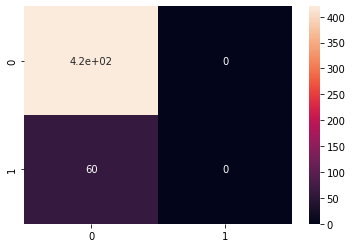

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

sns.heatmap(confusion_matrix(y_tst, pred), annot=True)

In [60]:
accuracy_score(y_pred=pred, y_true=y_tst)

0.875

In [61]:
max = 0
for estimator in score["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    acc = accuracy_score(y_pred=pred, y_true=y_tst)
    if acc > max:
        print(acc)
        max = acc

0.875
0.8770833333333333


Conclusion

On remarque une bonne accuracy, mais celle ci est due à la mauvaise répartition des classes, il faut donc travailler sur ce point pour espérer avoir un meilleur recall

## Sampling

<AxesSubplot:>

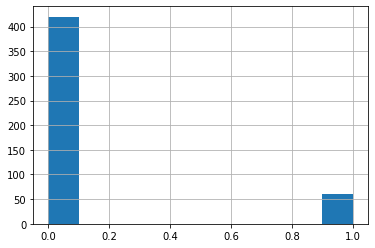

In [62]:
y = pd.Series(y)
y.hist()

On remaques que les classes sont très disproportionnées et que le modèles à donc des difficultés à apprendre